In [7]:
import numpy as np
import pandas as pd
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import tracemalloc

In [8]:
Df = pd.read_csv('/content/hotel_bookings.csv')

In [9]:
Df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
Df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

# Handling NULL values and EDA:

In [13]:
Df.duplicated().sum()

np.int64(31994)

So, there are 31994 duplicate rows. Let's drop them.

In [14]:
Df.drop_duplicates(keep='first',inplace=True)

In [15]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


In [16]:
Df['children'] = Df['children'].fillna(Df['children'].mode().iloc[0])
#Mode and Median of children column is zero

In [17]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Agent and company columns have NULL values but these values do not represent lack of any value rather they mean "Not Applicable" (described in dataset description). We should impute these null values with an appropriate value describing the same.

<Axes: ylabel='Frequency'>

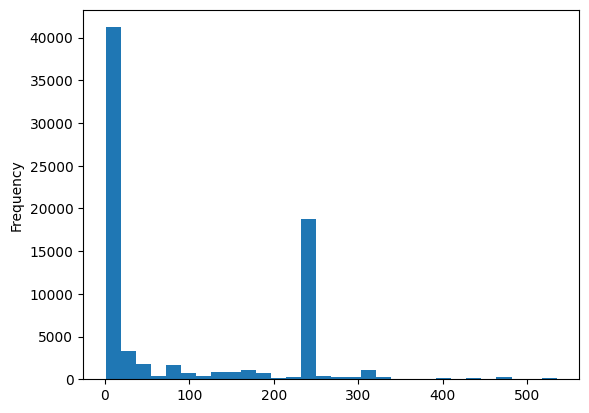

In [18]:
Df['agent'].plot(kind='hist',bins=30)

In [19]:
(Df['agent'] == -1).any()

np.False_

So, the agent colunmn does not have any code equal to -1 as all the codes are positive. We can impute the NULL values with -1 to indicate that no agent was present for the booking.

In [20]:
Df['agent'] = Df['agent'].fillna(-1)

In [21]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


We follow the same imputation procedure for "company" column.

<Axes: ylabel='Frequency'>

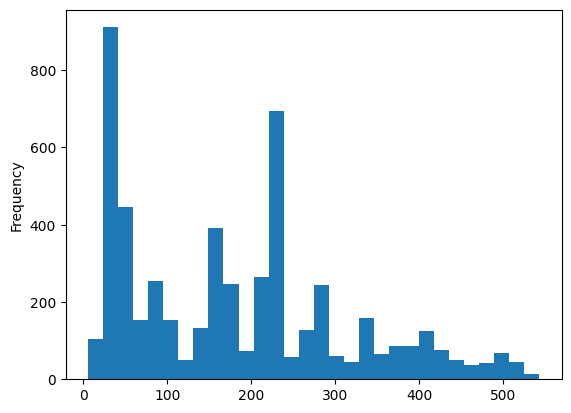

In [22]:
Df['company'].plot(kind='hist',bins=30)

In [23]:
(Df['company'] == -1).any()

np.False_

In [24]:
Df['company'] = Df['company'].fillna(-1)

In [25]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Now, that null values are handled in numerical features, let's check the same in Categorical features now.

In [26]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,452
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


488 rows reflect approximately 0.4% of the data. We need to impute the null values with a reasonable imputation value. By common sense, let's take the mode of 'country'column and impute it.

In [27]:
Df['country'] = Df['country'].fillna(Df['country'].mode().iloc[0])

In [28]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,0
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


In [29]:
Df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Steps to control leakage:


In [30]:
Df.drop(['reservation_status'],axis=1,inplace=True)

In [31]:
Df.drop(['reservation_status_date'],axis=1,inplace=True)

In [32]:
Df.drop(['previous_cancellations'],axis=1,inplace=True)

In [33]:
Df.drop(['previous_bookings_not_canceled'],axis=1,inplace=True)

In [34]:
Df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [35]:
#Removing the target variable before scaling
target_series = Df['is_canceled']
Df.drop(['is_canceled'],axis=1,inplace=True)

# Scaling numerical features:

In [36]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

In [37]:
numerical_features = numerical_features.drop(['is_repeated_guest'])

# is_repeated_guest is a boolean numerical feature, it will not require scaling.

In [38]:
Df[numerical_features]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,3,-1.0,-1.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,4,-1.0,-1.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,-1.0,-1.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,304.0,-1.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,240.0,-1.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,394.0,-1.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,9.0,-1.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,9.0,-1.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,89.0,-1.0,0,104.40,0,0


In [39]:
Df[numerical_features].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
Df[numerical_features] = scaler.fit_transform(Df[numerical_features])

In [42]:
Df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    87396 non-null  float64
 1   arrival_date_year            87396 non-null  float64
 2   arrival_date_week_number     87396 non-null  float64
 3   arrival_date_day_of_month    87396 non-null  float64
 4   stays_in_weekend_nights      87396 non-null  float64
 5   stays_in_week_nights         87396 non-null  float64
 6   adults                       87396 non-null  float64
 7   children                     87396 non-null  float64
 8   babies                       87396 non-null  float64
 9   booking_changes              87396 non-null  float64
 10  agent                        87396 non-null  float64
 11  company                      87396 non-null  float64
 12  days_in_waiting_list         87396 non-null  float64
 13  adr                 

# Encoding categorical features

In [43]:
Df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


None of the categorical features seem to have an ordinal relationship as far as predicting booking cancellations is concerned. Let's explore the cardinality of all features.

In [44]:
#Determining the cardinality of all categorical features:

for i in categorical_features:
  print (f"{i} = {Df[i].nunique()}")

hotel = 2
arrival_date_month = 12
meal = 5
country = 177
market_segment = 8
distribution_channel = 5
reserved_room_type = 10
assigned_room_type = 12
deposit_type = 3
customer_type = 4


Since there are many features with high cardinality, we will employ Target encoding with Nested cross validation with GridsearchCV during hyperparameter tuning.

# Splitting Training and testing data:

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [46]:
numerical_features

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [47]:
#Converting all values to float32, as per assignment requirements
Df[numerical_features] = Df[numerical_features].astype(np.float32)
Df['is_repeated_guest'] = Df['is_repeated_guest'].astype(np.float32)

In [48]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  object 
 1   lead_time                    87396 non-null  float32
 2   arrival_date_year            87396 non-null  float32
 3   arrival_date_month           87396 non-null  object 
 4   arrival_date_week_number     87396 non-null  float32
 5   arrival_date_day_of_month    87396 non-null  float32
 6   stays_in_weekend_nights      87396 non-null  float32
 7   stays_in_week_nights         87396 non-null  float32
 8   adults                       87396 non-null  float32
 9   children                     87396 non-null  float32
 10  babies                       87396 non-null  float32
 11  meal                         87396 non-null  object 
 12  country                      87396 non-null  object 
 13  market_segment      

In [49]:
#Using x and y variable naming for training and test data for easier interpretation

x_train,x_test,y_train,y_test = train_test_split(Df,target_series,random_state=1,test_size=0.2)

In [50]:
x_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
29714,Resort Hotel,-0.777338,-0.306510,November,1.328142,-1.450526,-0.974172,-0.791496,0.198253,-0.304108,...,A,2.376649,No Deposit,2.609171,-0.204226,-0.074839,Transient-Party,-1.242187,-0.29917,0.362324
35717,Resort Hotel,-0.754096,1.151008,April,-0.719466,1.492283,-0.974172,-0.791496,0.198253,-0.304108,...,A,2.376649,No Deposit,1.536915,-0.204226,-0.074839,Transient,-0.206081,-0.29917,-0.839684
8853,Resort Hotel,1.907090,-0.306510,October,1.181884,0.020878,0.963971,1.156329,0.198253,-0.304108,...,E,-0.373470,No Deposit,1.446046,-0.204226,-0.074839,Transient,0.248352,-0.29917,0.362324
21727,Resort Hotel,-0.928410,-0.306510,March,-1.158239,-0.771417,-0.974172,-0.791496,0.198253,-0.304108,...,E,-0.373470,No Deposit,-0.743902,-0.204226,-0.074839,Transient,-0.933173,-0.29917,0.362324
93447,City Hotel,0.222060,-0.306510,July,0.231209,0.247248,-0.005101,0.182416,0.198253,-0.304108,...,A,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,0.643709,-0.29917,1.564332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26215,Resort Hotel,0.280164,-0.306510,July,0.231209,0.699988,-0.005101,-0.304540,3.390609,-0.304108,...,G,7.876889,No Deposit,-0.689380,-0.204226,-0.074839,Transient-Party,2.658664,-0.29917,-0.839684
102640,City Hotel,2.708933,-0.306510,December,1.620657,-1.676896,-0.974172,0.182416,0.198253,-0.304108,...,D,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,-0.264248,-0.29917,0.362324
69750,City Hotel,0.222060,1.151008,June,-0.280693,-1.224157,-0.005101,0.182416,0.198253,4.083119,...,F,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,2.611403,-0.29917,-0.839684
6994,Resort Hotel,0.675275,-0.306510,July,0.158080,0.020878,-0.005101,-0.791496,0.198253,-0.304108,...,E,-0.373470,No Deposit,1.446046,-0.204226,-0.074839,Transient,1.466232,-0.29917,0.362324


In [51]:
y_train

,is_canceled
29714,0
35717,0
8853,1
21727,0
93447,0
...,...
26215,0
102640,0
69750,1
6994,1


In [52]:
x_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
97875,City Hotel,-0.266018,-0.306510,September,0.889369,0.586803,-0.974172,-0.791496,0.198253,-0.304108,...,D,-0.373470,No Deposit,-0.671207,-0.204226,-0.074839,Transient,0.158193,-0.29917,1.564332
44606,City Hotel,1.511980,-1.764027,October,1.035626,-0.884602,-0.005101,0.182416,0.198253,-0.304108,...,D,-0.373470,No Deposit,-0.625772,-0.204226,-0.074839,Transient-Party,-0.610526,-0.29917,-0.839684
50472,City Hotel,0.152334,-0.306510,May,-0.573208,-1.563712,-0.005101,-1.278453,0.198253,-0.304108,...,A,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,0.177461,-0.29917,-0.839684
27024,Resort Hotel,2.081404,-0.306510,August,0.450596,-0.545047,0.963971,1.156329,0.198253,-0.304108,...,A,2.376649,No Deposit,0.564614,-0.204226,-0.074839,Transient,0.106569,-0.29917,0.362324
26883,Resort Hotel,-0.405469,-0.306510,August,0.450596,-0.545047,-0.974172,0.182416,0.198253,-0.304108,...,A,-0.373470,No Deposit,1.446046,-0.204226,-0.074839,Transient,1.938842,-0.29917,0.362324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106905,City Hotel,-0.916789,1.151008,March,-1.304497,-1.337342,-0.974172,-0.791496,0.198253,-0.304108,...,A,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,0.193820,-0.29917,-0.839684
55187,City Hotel,0.919314,-0.306510,August,0.450596,-0.997787,0.963971,-0.791496,0.198253,1.889506,...,A,-0.373470,No Deposit,-0.653033,-0.204226,-0.074839,Transient,0.439214,-0.29917,0.362324
23439,Resort Hotel,0.210439,-0.306510,April,-0.719466,0.473618,0.963971,0.669373,0.198253,-0.304108,...,F,-0.373470,No Deposit,1.464219,-0.204226,-0.074839,Transient,-0.438750,-0.29917,0.362324
79053,City Hotel,-0.928410,-1.764027,October,1.181884,0.473618,-0.974172,-0.791496,-1.397925,-0.304108,...,B,-0.373470,No Deposit,-0.743902,1.307604,-0.074839,Transient,0.302884,-0.29917,-0.839684


In [53]:
y_test

,is_canceled
97875,0
44606,1
50472,1
27024,0
26883,0
...,...
106905,0
55187,1
23439,0
79053,0


# Decision Tree algorithm:

In [51]:
dtc = DecisionTreeClassifier(random_state=1)
clock_time_dtc = [] #to report fit and predict times for Decision Tree classifier
tracemalloc.start() #to track peak RAM usage

In [52]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",dtc)
])

In [53]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__monotonic_cst', 'model__random_state', 'model__splitter'])

In [54]:
# Using HalvingGridsearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__ccp_alpha':[0,0.005],
    'model__max_depth':[6,10,14,18],
    'model__min_samples_leaf':[50,100, 200],
    'model__min_samples_split':[100,200,400],
    'model__max_features':["sqrt","log2",0.5],
    'model__ccp_alpha':[0.0,0.0001,0.0005,0.001],
    'model__class_weight':["balanced"]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [55]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

In [56]:
final_model.best_params_

{'model__min_samples_split': 100,
 'model__min_samples_leaf': 100,
 'model__max_features': 0.5,
 'model__max_depth': 18,
 'model__class_weight': 'balanced',
 'model__ccp_alpha': 0.0}

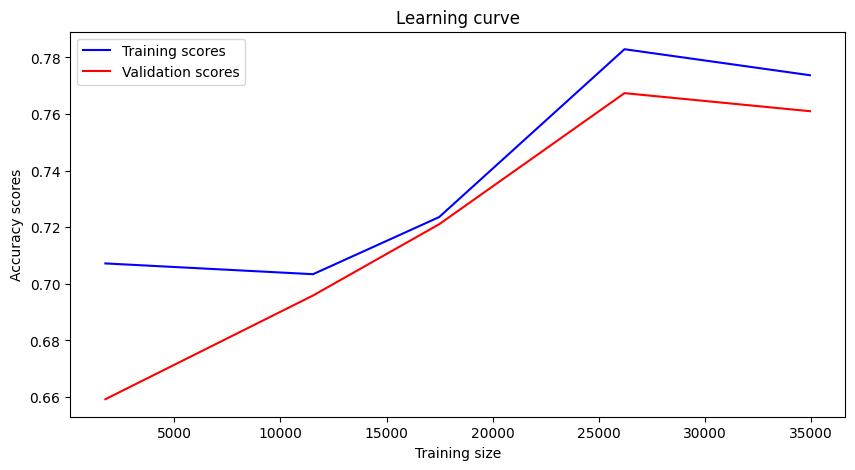

In [57]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.5,0.75,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [58]:
x = final_model.cv_results_['param_model__max_depth'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [59]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [18 18 10 14 18 18 18 14 10 14]
y_train_score : [0.77515876 0.75061502 0.70986613 0.74959952 0.73987356 0.73761371
 0.75509182 0.68962755 0.68151782 0.72093655]
y_val_score : [0.76245781 0.73429544 0.69190171 0.73576864 0.721194   0.73350878
 0.75263173 0.68449282 0.67499571 0.71242634]


In [60]:
#calculation of mean train and test scores from final_model.cv_results_.max_depth:

sum_train_score_6 = 0
sum_valid_score_6 = 0
sum_train_score_10 = 0
sum_valid_score_10 = 0
sum_train_score_18 = 0
sum_valid_score_18 = 0

for i in range(len(x)):
  if (x[i] == 6):
    sum_train_score_6 = sum_train_score_6 + y_train_score[i]
    sum_valid_score_6 = sum_valid_score_6 + y_val_score[i]

  elif (x[i] == 18):
    sum_train_score_18 = sum_train_score_18 + y_train_score[i]
    sum_valid_score_18 = sum_valid_score_18 + y_val_score[i]

  elif (x[i] == 10):
    sum_train_score_10 = sum_train_score_10 + y_train_score[i]
    sum_valid_score_10 = sum_valid_score_10 + y_val_score[i]

mean_train_score_6 = sum_train_score_6/2.0
mean_train_score_18 = sum_train_score_18/3.0
mean_train_score_10 = sum_train_score_10/5.0

mean_valid_score_6 = sum_valid_score_6/2.0
mean_valid_score_18 = sum_valid_score_18/3.0
mean_valid_score_10 = sum_valid_score_10/5.0

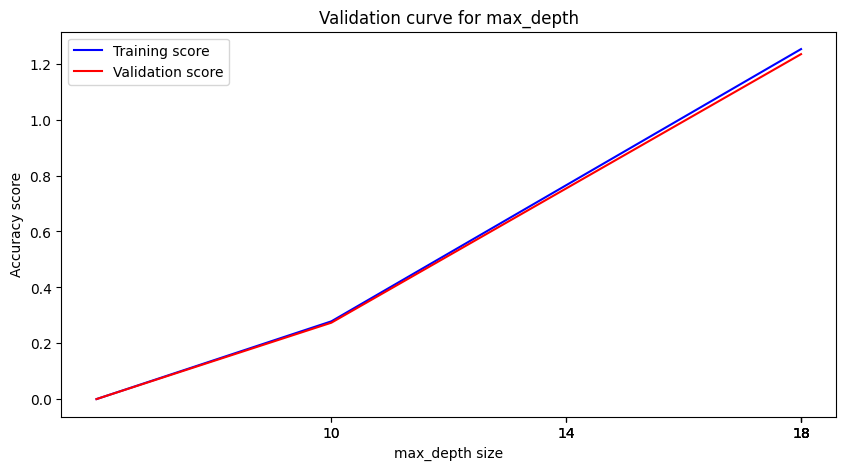

In [61]:
#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot([6,10,18],[mean_train_score_6,mean_train_score_10,mean_train_score_18],color="blue",label="Training score")
plt.plot([6,10,18],[mean_valid_score_6,mean_valid_score_10,mean_valid_score_18],color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("max_depth size")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for max_depth")
plt.legend()
plt.show()

In [62]:
x = final_model.cv_results_['param_model__ccp_alpha'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [63]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [0.     0.0001 0.     0.0005 0.     0.0001 0.001  0.001  0.001  0.0005]
y_train_score : [0.77515876 0.75061502 0.70986613 0.74959952 0.73987356 0.73761371
 0.75509182 0.68962755 0.68151782 0.72093655]
y_val_score : [0.76245781 0.73429544 0.69190171 0.73576864 0.721194   0.73350878
 0.75263173 0.68449282 0.67499571 0.71242634]


In [64]:
#calculation of mean train and test scores from final_model.cv_results_.ccp_alpha:

sum_train_score_0 = 0
sum_valid_score_0 = 0
sum_train_score_0001 = 0
sum_valid_score_0001 = 0
sum_train_score_0005 = 0
sum_valid_score_0005 = 0
sum_train_score_001 = 0
sum_valid_score_001 = 0


for i in range(len(x)):
  if (x[i] == 0.0):
    sum_train_score_0 = sum_train_score_0 + y_train_score[i]
    sum_valid_score_0 = sum_valid_score_0 + y_val_score[i]

  elif (x[i] == 0.0001):
    sum_train_score_0001 = sum_train_score_0001 + y_train_score[i]
    sum_valid_score_0001 = sum_valid_score_0001 + y_val_score[i]

  elif (x[i] == 0.0005):
    sum_train_score_0005 = sum_train_score_0005 + y_train_score[i]
    sum_valid_score_0005 = sum_valid_score_0005 + y_val_score[i]

  elif (x[i] == 0.001):
    sum_train_score_001 = sum_train_score_001 + y_train_score[i]
    sum_valid_score_001 = sum_valid_score_001 + y_val_score[i]


mean_train_score_0 = sum_train_score_0/3.0
mean_train_score_0001 = sum_train_score_0001/5.0
mean_train_score_0005 = sum_train_score_0005/1.0
mean_train_score_001 = sum_train_score_001/1.0

mean_valid_score_0 = sum_valid_score_0/3.0
mean_valid_score_0001 = sum_valid_score_0001/5.0
mean_valid_score_0005 = sum_valid_score_0005/1.0
mean_valid_score_001 = sum_valid_score_001/1.0

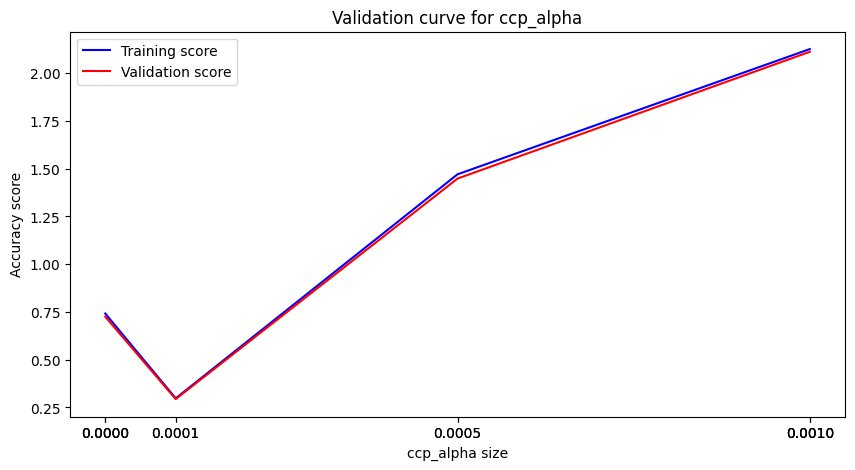

In [65]:
#Plotting Validation curve/Model complexity curve for ccp_alpha:
plt.figure(figsize=(10,5))
plt.plot([0,0.0001,0.0005,0.001],[mean_train_score_0,mean_train_score_0001,mean_train_score_0005,mean_train_score_001],color="blue",label="Training score")
plt.plot([0,0.0001,0.0005,0.001],[mean_valid_score_0,mean_valid_score_0001,mean_valid_score_0005,mean_valid_score_001],color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("ccp_alpha size")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for ccp_alpha")
plt.legend()
plt.show()

In [66]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_dtc.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [67]:
clock_time_dtc

[(10.382970809936523, 0.06951761245727539)]

In [68]:
#Wall-clock fit and predict times
print (f"Fit time for Decision Tree classifier: {clock_time_dtc[0][0]:0.2f} seconds")
print (f"Predict time for Decision Tree classifier: {clock_time_dtc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for Decision Tree classifier: 10.38 seconds
Predict time for Decision Tree classifier: 0.07 seconds
Peak RAM usage: 56.89 MBs


In [69]:
metrics.confusion_matrix(y_test,y_predict)

array([[9918, 2870],
       [ 833, 3859]])

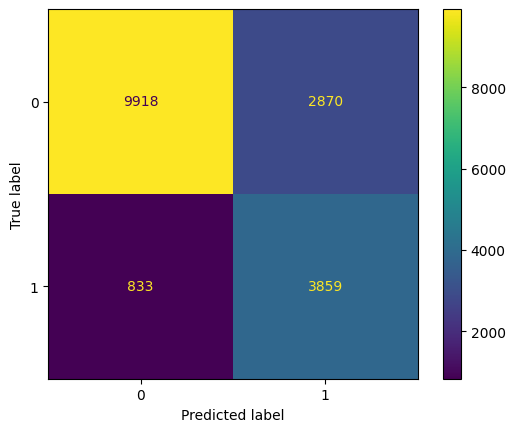

In [70]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [71]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.7881578947368421
Precision = 0.57348788824491
Recall = 0.822463768115942
F1 score = 0.6757726994133614


In [72]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]

In [73]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)

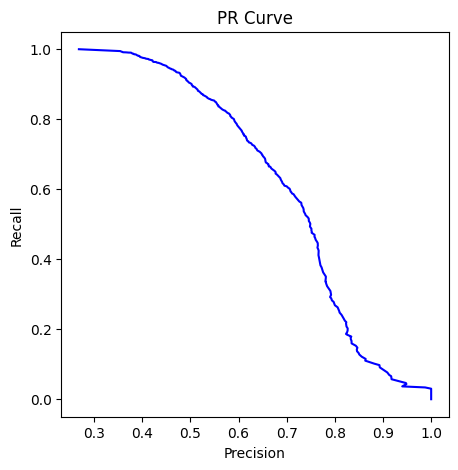

In [74]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

In [75]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)

In [76]:
auc = metrics.roc_auc_score(y_test,y_predict_proba)

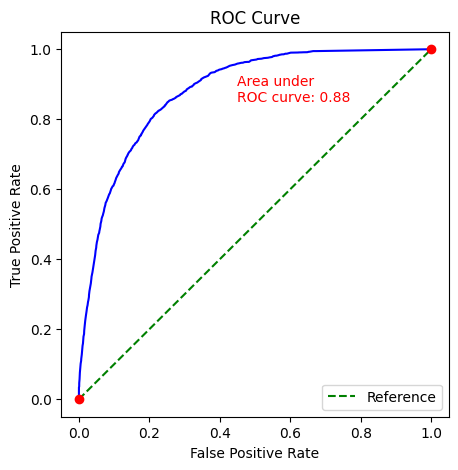

In [77]:
#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Neural Networks algorithm:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=1,max_iter=6,batch_size=512,early_stopping=True,shuffle=True,n_iter_no_change=2)
clock_time_mlp = [] #to report fit and predict times for Multilayer Perceptron classifier
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",mlp)
])

In [ ]:
pipe.get_params().keys()


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__activation', 'model__alpha', 'model__batch_size', 'model__beta_1', 'model__beta_2', 'model__early_stopping', 'model__epsilon', 'model__hidden_layer_sizes', 'model__learning_rate', 'model__learning_rate_init', 'model__max_fun', 'model__max_iter', 'model__momentum', 'model__n_iter_no_change', 'model__nesterovs_momentum', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__solver', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [ ]:
# Using RandomizedSearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__hidden_layer_sizes':[(512,512),(256,256,256,256,128,128,128,128)]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
final_model.best_params_

{'model__hidden_layer_sizes': (256, 256, 256, 256, 128, 128, 128, 128)}

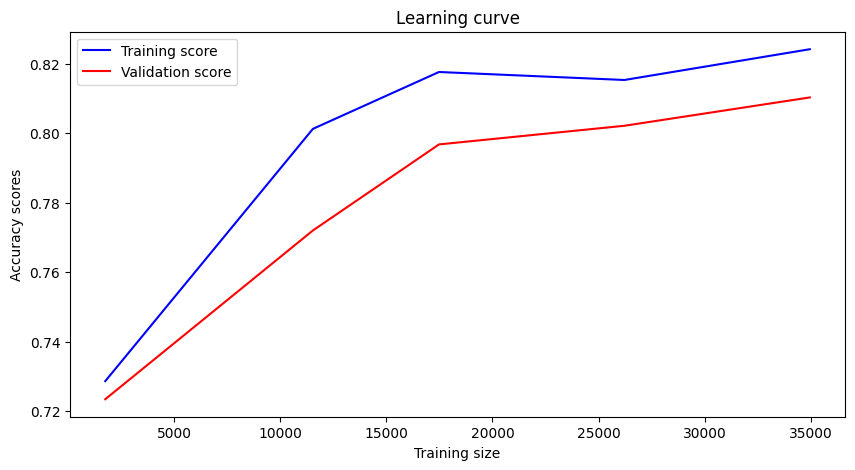

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.5,0.75,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training score")
plt.plot(train_sizes, test_mean, color="red",label="Validation score")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__hidden_layer_sizes'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x: {x}")
print (f"y_train_score: {y_train_score}")
print (f"y_val_score: {y_val_score}")

x: [(512, 512) (256, 256, 256, 256, 128, 128, 128, 128)]
y_train_score: [0.82408891 0.81915441]
y_val_score: [0.80839865 0.81081584]


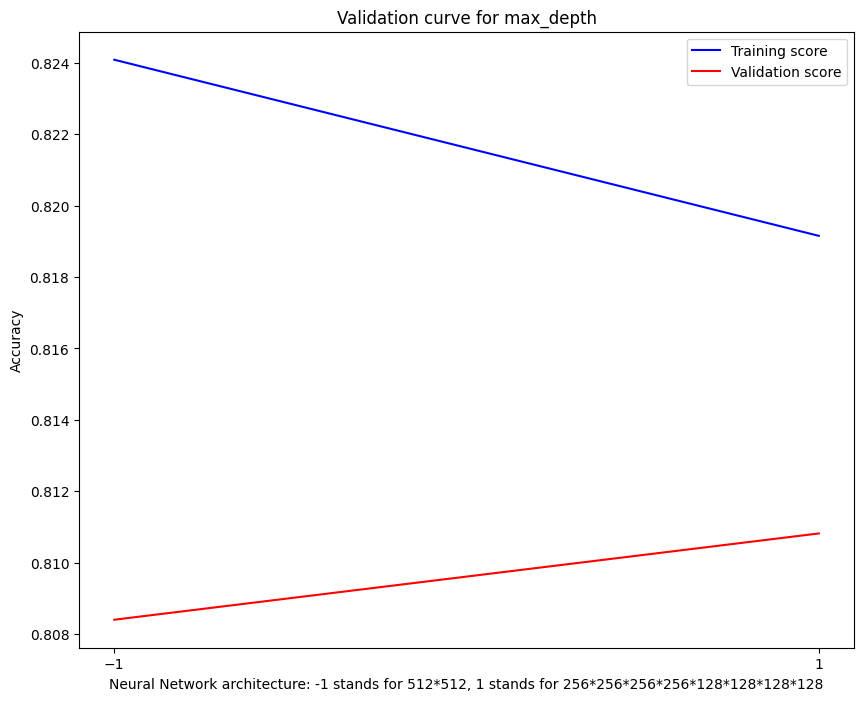

In [ ]:
#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,8))
plt.plot([-1,1],y_train_score,color="blue",label="Training score")
plt.plot([-1,1],y_val_score,color="red",label="Validation score")
plt.xlabel("Neural Network architecture: -1 stands for 512*512, 1 stands for 256*256*256*256*128*128*128*128")
plt.xticks([-1,1])
plt.ylabel("Accuracy")
plt.title("Validation curve for max_depth")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_mlp.append ((fit_time, predict_time))
current_RAM,peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for Multi layer perceptron: {clock_time_mlp[0][0]:0.2f} seconds")
print (f"Predict time for Multi layer perceptron: {clock_time_mlp[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for Multi layer perceptron: 153.81 seconds
Predict time for Multi layer perceptron: 0.64 seconds
Peak RAM usage: 80.37 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[11780,  1008],
       [ 2146,  2546]])

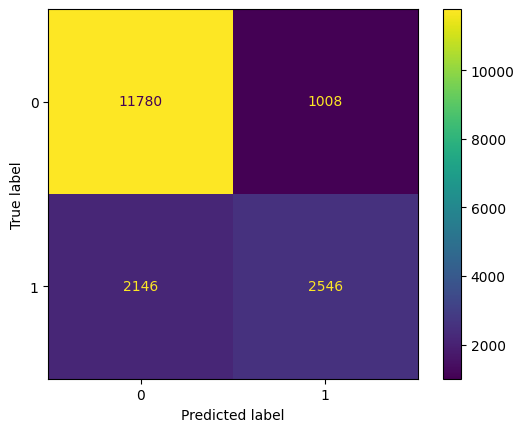

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.8195652173913044
Precision = 0.7163759144625774
Recall = 0.5426257459505541
F1 score = 0.6175115207373272


In [ ]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]

In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)

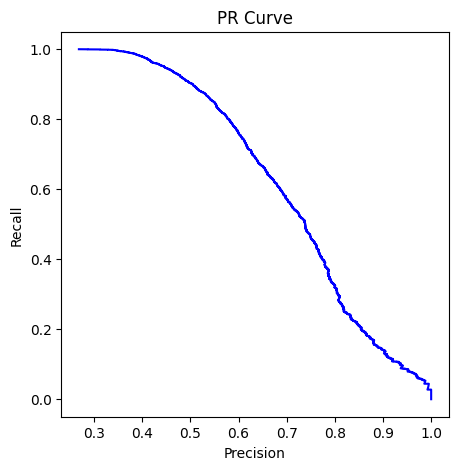

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()


In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)

In [ ]:
auc = metrics.roc_auc_score(y_test,y_predict_proba)

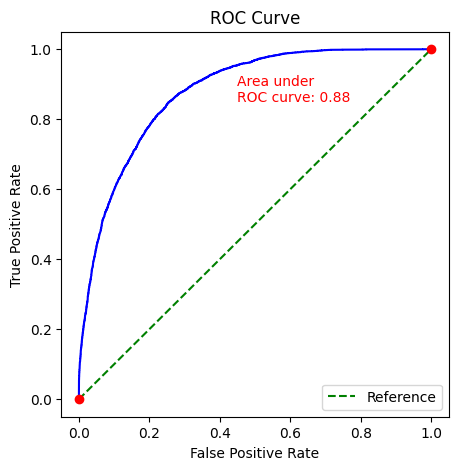

In [ ]:
#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# K-NN algorithm:

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knc = KNeighborsClassifier(algorithm='brute',metric='euclidean',n_jobs=-1)
clock_time_knc = [] #to report fit and predict times for K Neighbors classifier
tracemalloc.start()

In [56]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",knc)
])

In [57]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [58]:
# Using RandomizedSearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__n_neighbors':[3,5,11,21],
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [59]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [60]:
final_model.best_params_

{'model__n_neighbors': 21}

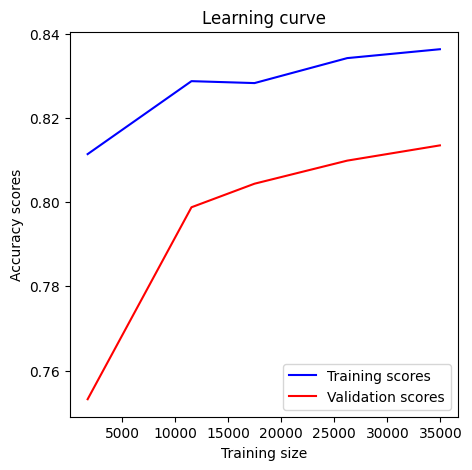

In [61]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.5,0.75,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [62]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds
current_RAM,peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()


clock_time_knc.append ((fit_time, predict_time))


#Wall-clock fit and predict times
print (f"Fit time for KNN: {clock_time_knc[0][0]} seconds")
print (f"Predict time for KNN: {clock_time_knc[0][1]} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for KNN: 130.6914985179901 seconds
Predict time for KNN: 11.915704488754272 seconds
Peak RAM usage: 57.02 MBs


In [63]:
metrics.confusion_matrix(y_test,y_predict)

array([[11541,  1247],
       [ 1805,  2887]])

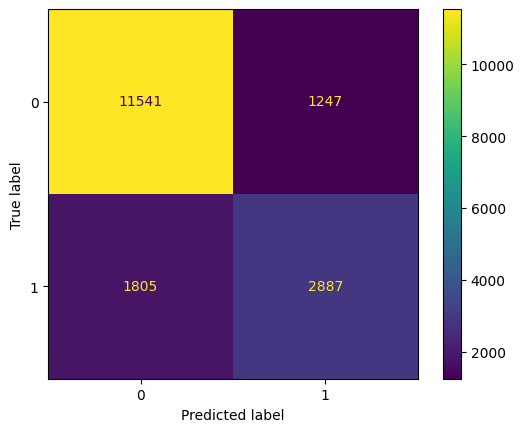

In [64]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [65]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.8254004576659039
Precision = 0.6983551040154814
Recall = 0.6153026427962489
F1 score = 0.6542034896895536


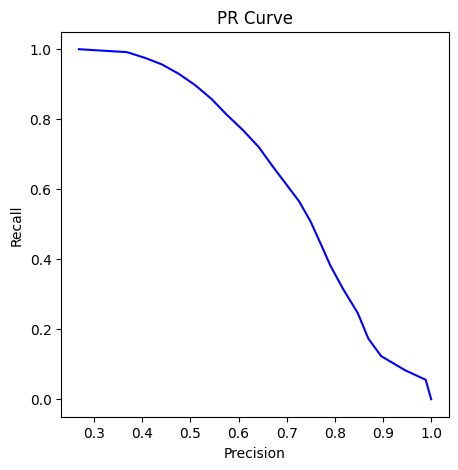

In [66]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]


precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)


#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

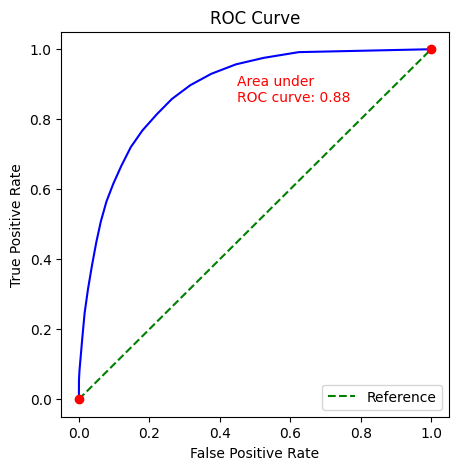

In [67]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)


auc = metrics.roc_auc_score(y_test,y_predict_proba)


#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine algorithm:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
lsvc = LinearSVC(random_state=1,class_weight="balanced")
clock_time_lsvc = [] #to report fit and predict times for Linear SVC
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",lsvc)
])

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__loss', 'model__max_iter', 'model__multi_class', 'model__penalty', 'model__random_state', 'model__tol', 'model__verbose'])

In [ ]:
# Using GridSearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__C':[0.1,1,10]
}

final_model = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

In [ ]:
final_model.best_params_

{'model__C': 10}

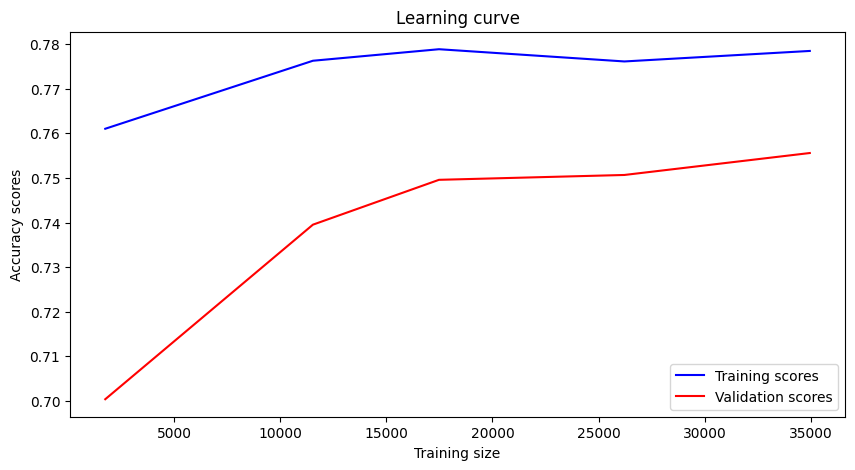

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.5,0.75,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__C'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [ 0.1  1.  10. ]
y_train_score : [0.77651754 0.77747583 0.77843412]
y_val_score : [0.752975   0.75509182 0.75543509]


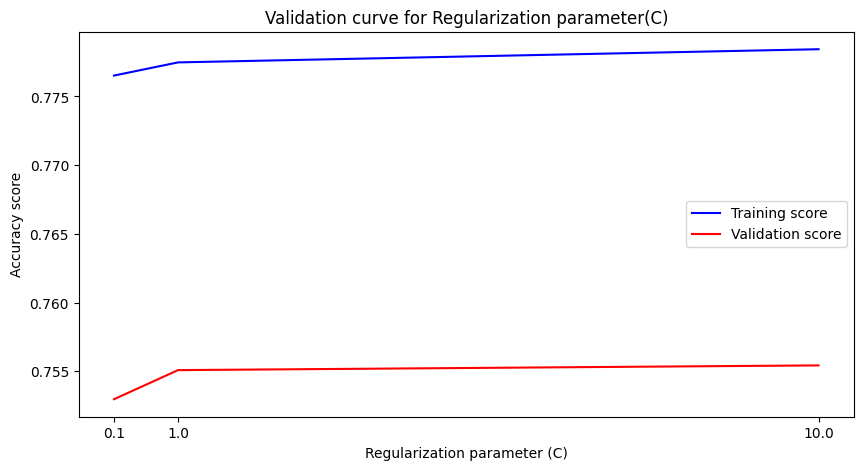

In [ ]:
#Plotting Validation curve/Model complexity curve for Regularization parameter (C):
plt.figure(figsize=(10,5))
plt.plot(x,y_train_score,color="blue",label="Training score")
plt.plot(x,y_val_score,color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("Regularization parameter (C)")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for Regularization parameter(C)")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds
current_RAM,peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
clock_time_lsvc.append ((fit_time, predict_time))

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for LSVC: {clock_time_lsvc[0][0]} seconds")
print (f"Predict time for LSVC: {clock_time_lsvc[0][1]} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for LSVC: 7.262317895889282 seconds
Predict time for LSVC: 0.11001014709472656 seconds
Peak RAM usage: 56.73 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[9602, 3186],
       [ 941, 3751]])

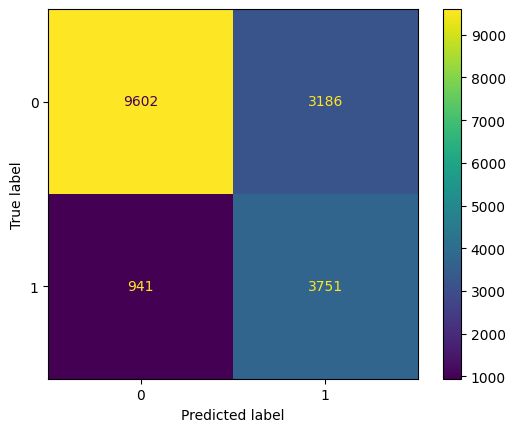

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.7639016018306636
Precision = 0.5407236557589736
Recall = 0.7994458653026428
F1 score = 0.645111359532204


In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict)

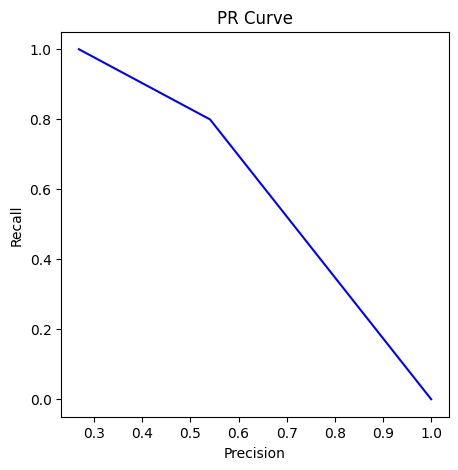

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

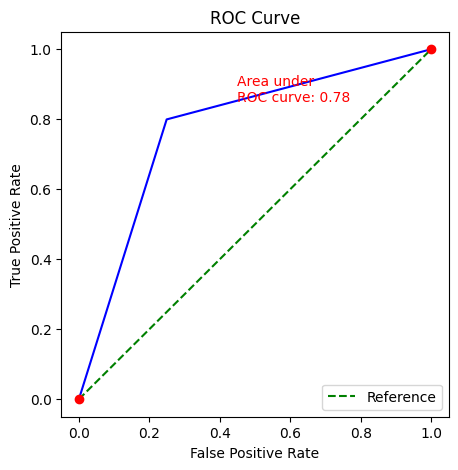

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)


auc = metrics.roc_auc_score(y_test,y_predict)


#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**Kernel SVM (RBF):**

In [ ]:
svc = SVC(kernel='rbf',random_state=1)
clock_time_svc = [] #to report fit and predict times for Support vector classification
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",svc)
])

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__C', 'model__break_ties', 'model__cache_size', 'model__class_weight', 'model__coef0', 'model__decision_function_shape', 'model__degree', 'model__gamma', 'model__kernel', 'model__max_iter', 'model__probability', 'model__random_state', 'model__shrinking', 'model__tol', 'model__verbose'])

In [ ]:
# Using RandomizedCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__C':[0.5,2,8],
    'model__gamma':['scale',1/69916,2/69916]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
final_model.best_params_

{'model__gamma': 'scale', 'model__C': 8}

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


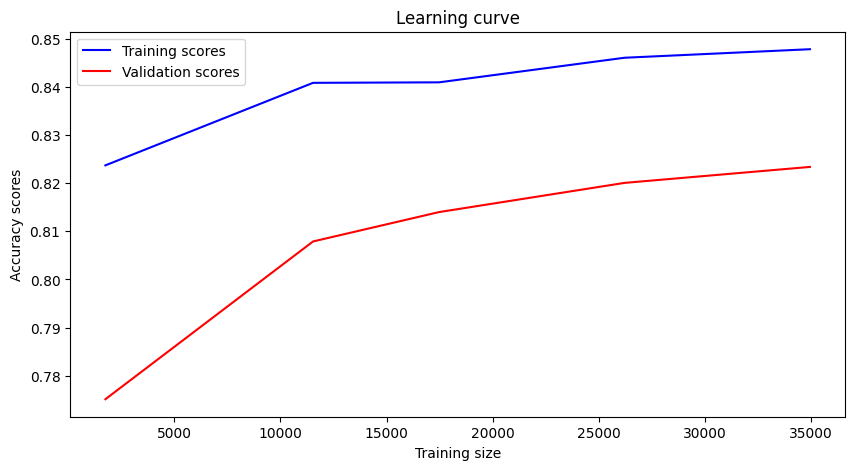

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.5,0.75,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__C'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [0.5 0.5 0.5 2.  2.  2.  8.  8.  8. ]
y_train_score : [0.82819383 0.72348246 0.72348246 0.83820585 0.72348246 0.72348246
 0.84673036 0.72348246 0.72348246]
y_val_score : [0.81469192 0.72348246 0.72348246 0.81971223 0.72348246 0.72348246
 0.82363121 0.72348246 0.72348246]


In [ ]:
#calculation of mean train and test scores from final_model.cv_results_

sum_train_score_5 = 0
sum_train_score_2 = 0
sum_train_score_8 = 0
sum_valid_score_5 = 0
sum_valid_score_2 = 0
sum_valid_score_8 = 0

for i in range(len(x)):
  if (x[i] == 0.5):
    sum_train_score_5 = sum_train_score_5 + y_train_score[i]
    sum_valid_score_5 = sum_valid_score_5 + y_val_score[i]

  elif (x[i] == 0.2):
    sum_train_score_2 = sum_train_score_2 + y_train_score[i]
    sum_valid_score_2 = sum_valid_score_2 + y_val_score[i]

  elif (x[i] == 8.0):
    sum_train_score_8 = sum_train_score_8 + y_train_score[i]
    sum_valid_score_8 = sum_valid_score_8 + y_val_score[i]

mean_train_score_5 = sum_train_score_5/3.0
mean_train_score_2 = sum_train_score_2/3.0
mean_train_score_8 = sum_train_score_8/3.0

mean_valid_score_5 = sum_valid_score_5/3.0
mean_valid_score_2 = sum_valid_score_2/3.0
mean_valid_score_8 = sum_valid_score_8/3.0

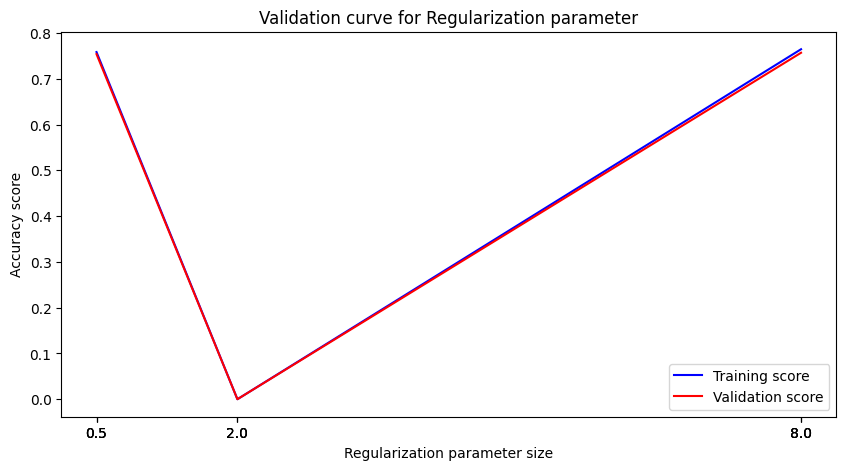

In [ ]:
#Plotting Validation curve/Model complexity curve for C:
plt.figure(figsize=(10,5))
plt.plot([0.5,2,8],[mean_train_score_5,mean_train_score_2,mean_train_score_8],color="blue",label="Training score")
plt.plot([0.5,2,8],[mean_valid_score_5,mean_valid_score_2,mean_valid_score_8],color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("Regularization parameter size")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for Regularization parameter")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_svc.append ((fit_time, predict_time))
current_RAM,peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for SVC (RBF): {clock_time_svc[0][0]:0.2f} seconds")
print (f"Predict time for SVC (RBF): {clock_time_svc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for SVC (RBF): 3639.74 seconds
Predict time for SVC (RBF): 51.65 seconds
Peak RAM usage: 56.85 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[11739,  1049],
       [ 1827,  2865]])

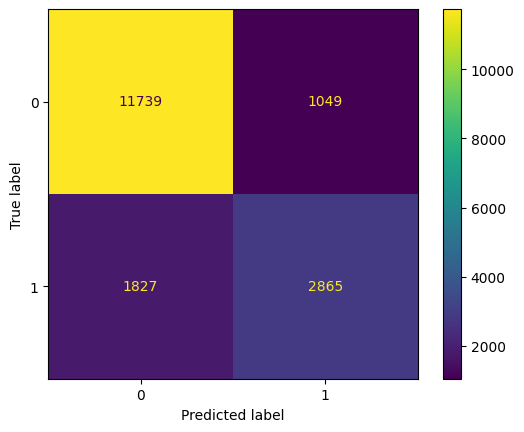

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.8354691075514874
Precision = 0.731987736331119
Recall = 0.610613810741688
F1 score = 0.6658145479897746


In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict)

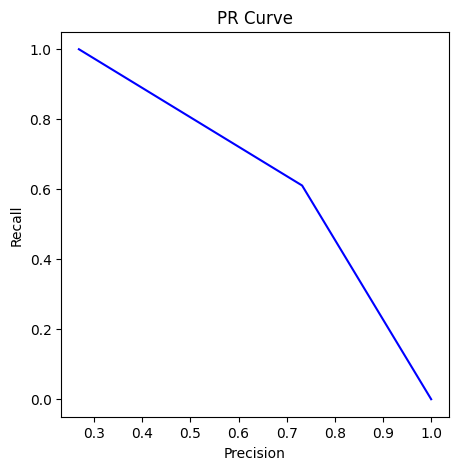

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

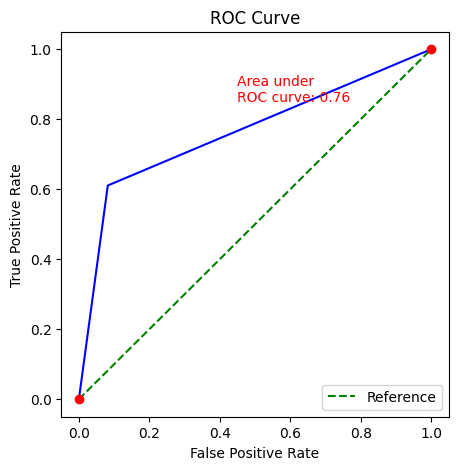

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)


auc = metrics.roc_auc_score(y_test,y_predict)


#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()